In [103]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("Datasets")

In [3]:
cars_data = pd.read_csv("cars_sampled.csv")

In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [5]:
sns.set(rc = {'figure.figsize' : (11.7,8.27)})
#dimensions for plots

In [6]:
cars = cars_data.copy()

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
dateCrawled            50001 non-null object
name                   50001 non-null object
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dateCreated            50001 non-null object
postalCode             50001 non-null int64
lastSeen               50001 non-null object
dtypes: int64(6), object(13)
memory usage:

In [8]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [9]:
#to get rid of scientific notation above
pd.set_option('display.float_format', lambda x: '%.3f' % x) #converts to 3 decimal places
#to display all the columns, and not have ... in output
pd.set_option('display.max_columns',500) #to display a max of 500 columns
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


#Data Cleaning

In [10]:
#dropping unwanted columns
col = ['name', 'dateCrawled', 'postalCode', 'lastSeen', 'dateCreated']
cars = cars.drop(columns = col, axis = 1)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
seller                 50001 non-null object
offerType              50001 non-null object
price                  50001 non-null int64
abtest                 50001 non-null object
vehicleType            44813 non-null object
yearOfRegistration     50001 non-null int64
gearbox                47177 non-null object
powerPS                50001 non-null int64
model                  47243 non-null object
kilometer              50001 non-null int64
monthOfRegistration    50001 non-null int64
fuelType               45498 non-null object
brand                  50001 non-null object
notRepairedDamage      40285 non-null object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


In [12]:
cars.drop_duplicates(keep = 'first', inplace = True)
#dropping duplicates, considering the first one as the non duplicate

In [13]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

26
38


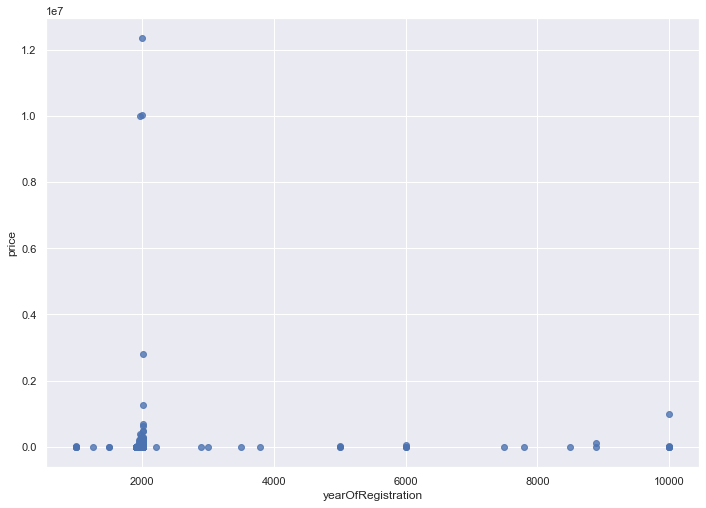

In [14]:
#variable year
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index() #yearwise counts, sorted based on the years, and not the count frequency value
print(sum(cars['yearOfRegistration'] > 2018))
print(sum(cars['yearOfRegistration'] < 1950))
sns.regplot(x = 'yearOfRegistration', y = 'price', scatter = True, fit_reg = False, data = cars)

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64


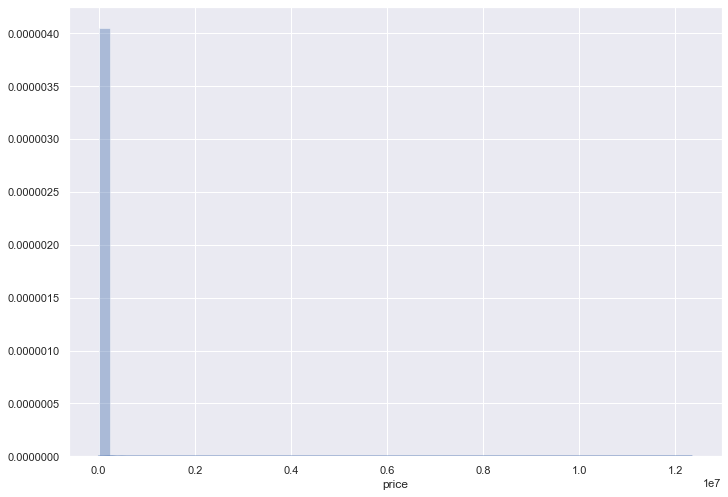

In [15]:
#Working range is to be set btn. 1950 - 2018 for year
#variable price
price_count = cars['price'].value_counts().sort_index()
sns.distplot(cars['price']) #histogram
print(cars['price'].describe())
#price is skewed. mean is 6k and median is 3k

34
1748


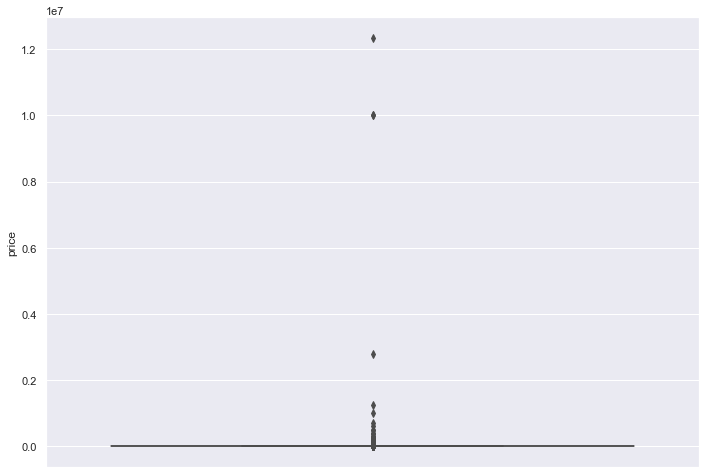

In [16]:
sns.boxplot(y = cars['price'])
print(sum(cars['price'] > 150000))
print(sum(cars['price'] < 100))
#boxplot is not even visible! very extreme outliers exist
#Working range is to be set btn. 100 and 150000

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64


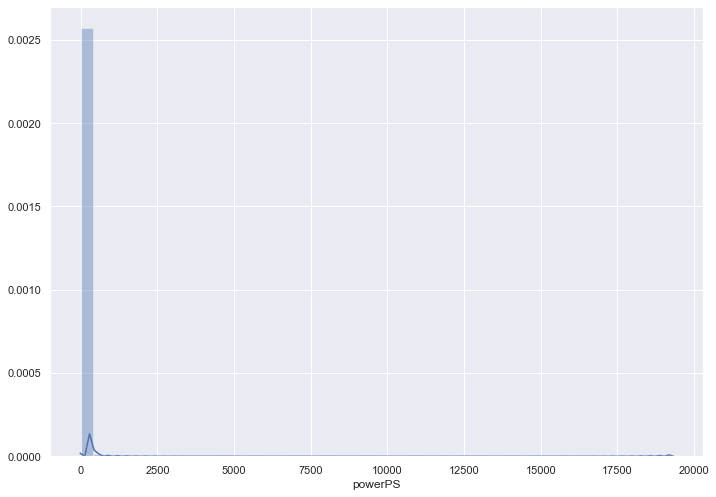

In [17]:
#variable powerPS
power_count = cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])
print(cars['powerPS'].describe())

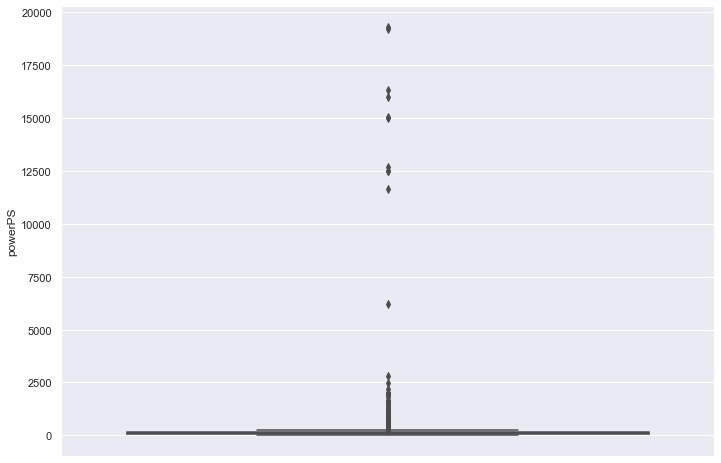

In [18]:
sns.boxplot(y = cars['powerPS'])

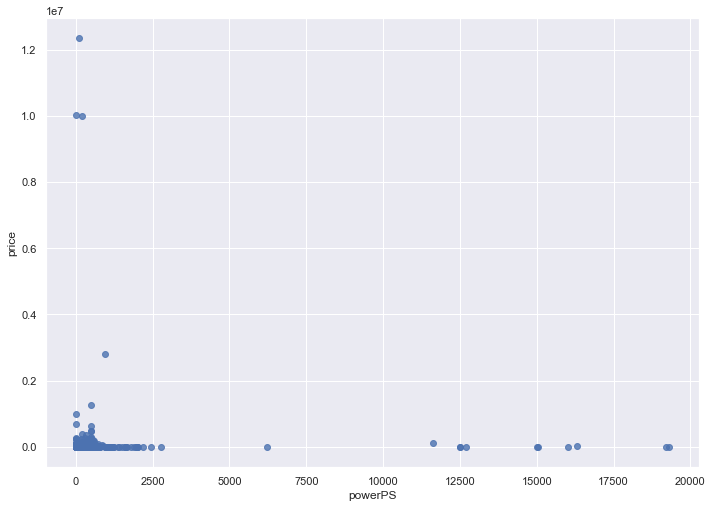

In [19]:
sns.regplot(x = 'powerPS', y = 'price', scatter = True, fit_reg = False, data = cars)

In [20]:
#extreme values are here too. SD is high even though mean and median are close
print(sum(cars['powerPS'] > 500))
print(sum(cars['powerPS'] < 10))
#working range : 10 - 500 for powerPS

#the working range is arrived by trial and error methods

115
5565


In [21]:
cars = cars[(cars.yearOfRegistration <= 2018) & (cars.yearOfRegistration >= 1950) & (cars.price >= 100) & (cars.price <= 150000) & (cars.powerPS >=10) & (cars.powerPS <=500)]
#thus we dropped records that did not confine to these bounds using the & operator(bounding)

In [22]:
cars.info() # we lost ~6.7k records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 14 columns):
seller                 42772 non-null object
offerType              42772 non-null object
price                  42772 non-null int64
abtest                 42772 non-null object
vehicleType            39896 non-null object
yearOfRegistration     42772 non-null int64
gearbox                41978 non-null object
powerPS                42772 non-null int64
model                  41089 non-null object
kilometer              42772 non-null int64
monthOfRegistration    42772 non-null int64
fuelType               40175 non-null object
brand                  42772 non-null object
notRepairedDamage      36495 non-null object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [23]:
#create a new column, viz. age and month of registration/12
cars['monthOfRegistration']/=12 #to keep everything in terms of year
#to get rid of zero values too
cars['Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [24]:
#since now we have incorporated Year and Month of Reg. into Age of Car,
#we do not need the Year and Month Column. We can drop them
cars = cars.drop(columns = ['yearOfRegistration', 'monthOfRegistration'], axis = 1) #column axis is 1, row axis is 0

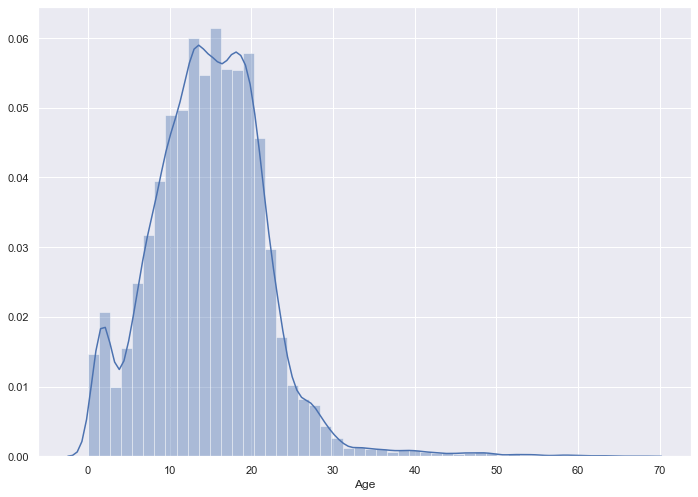

In [25]:
#visualising age
sns.distplot(cars.Age)

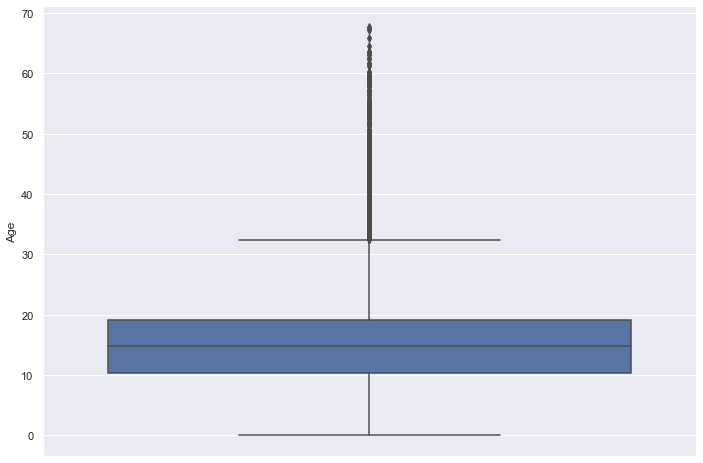

In [26]:
sns.boxplot(y = cars.Age)
#there are outliers. Box is visible though.

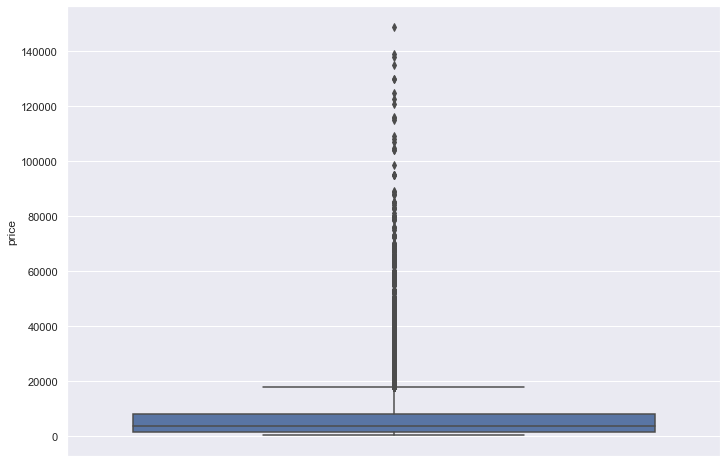

In [27]:
#checking price
sns.boxplot(y = cars.price)

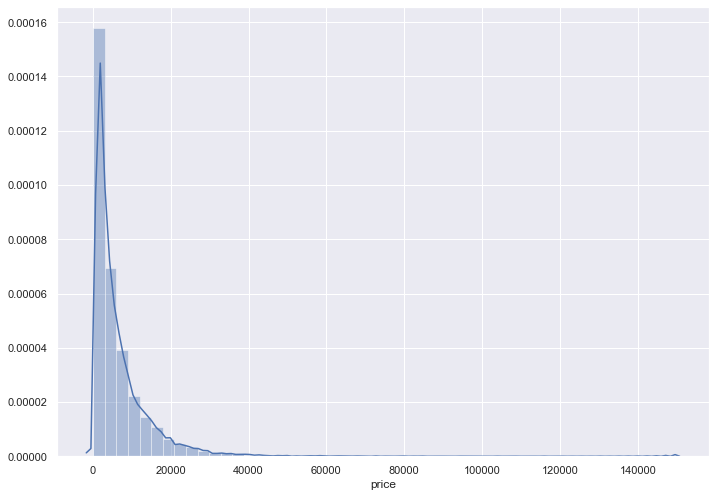

In [28]:
sns.distplot(cars.price)

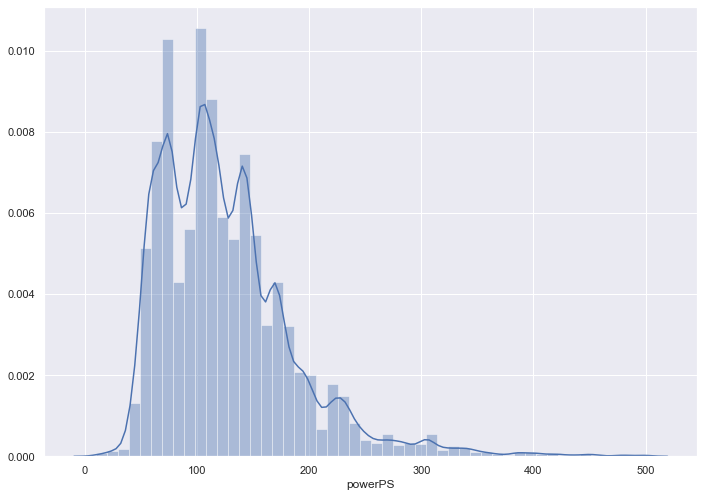

In [29]:
#powerPS
sns.distplot(cars.powerPS)

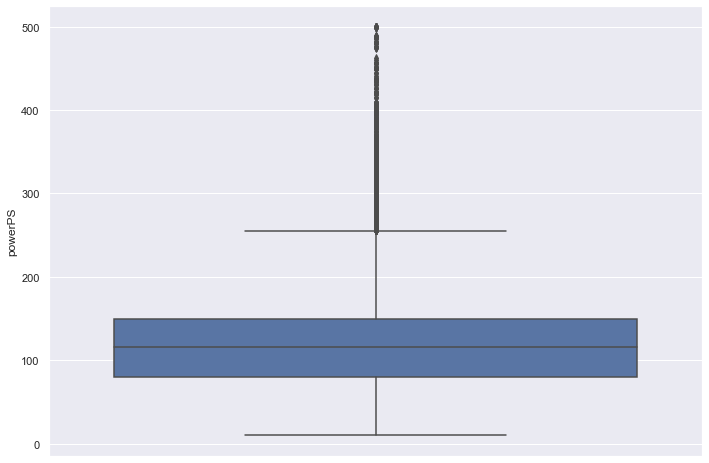

In [30]:
sns.boxplot(y = cars.powerPS)

In [31]:
#both of the columns are now better looking
#our bounds are effective.

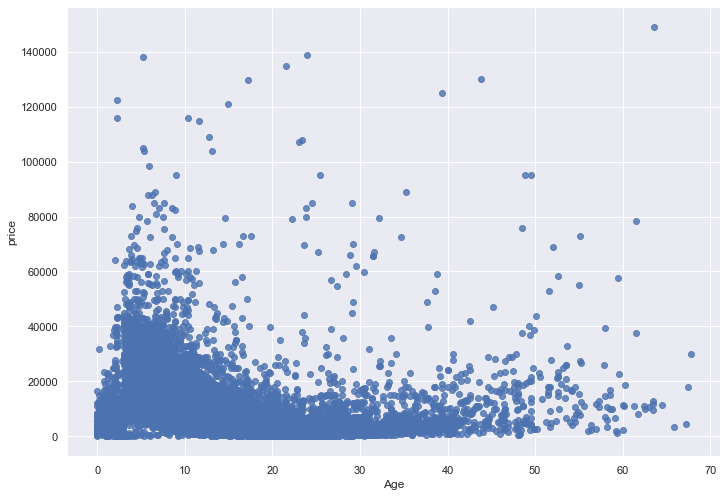

In [32]:
#age vs. price
sns.regplot(x = 'Age', y = 'price', scatter = True, fit_reg = False, data = cars)
#inference: high price cars are more newer
#           there are vintage cars also

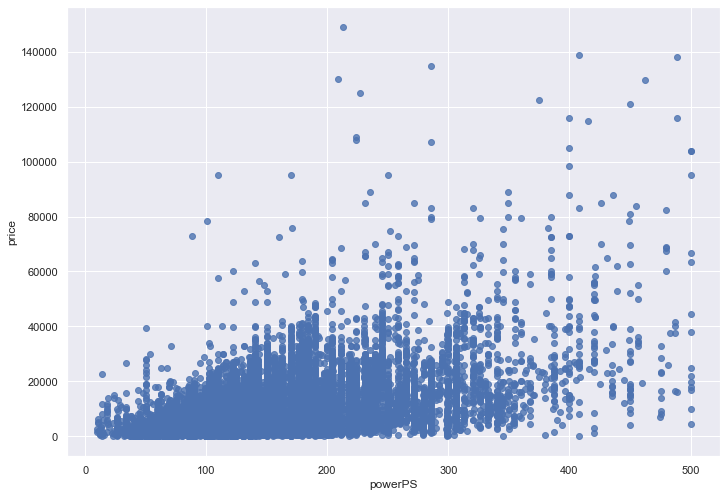

In [33]:
#powerPS vs Price
sns.regplot(y = 'price', x = 'powerPS', fit_reg = False, data = cars, scatter = True)
#high power cars are costlier

In [34]:
#seller variable
cars.seller.value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [35]:
#seller: commercial is insignificant
pd.crosstab(cars.seller, columns = 'count', normalize = True)

col_0,count
seller,
commercial,0.000
private,1.000


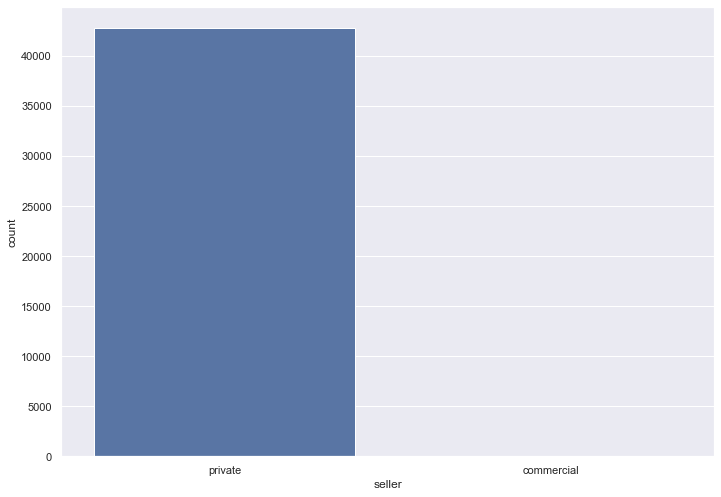

In [36]:
sns.countplot(x = 'seller', data = cars)

In [37]:
#var: offerType
cars.offerType.value_counts()
#column is insignificant as all are 'offer' type

offer    42772
Name: offerType, dtype: int64

In [38]:
#var: abtest
cars.abtest.value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

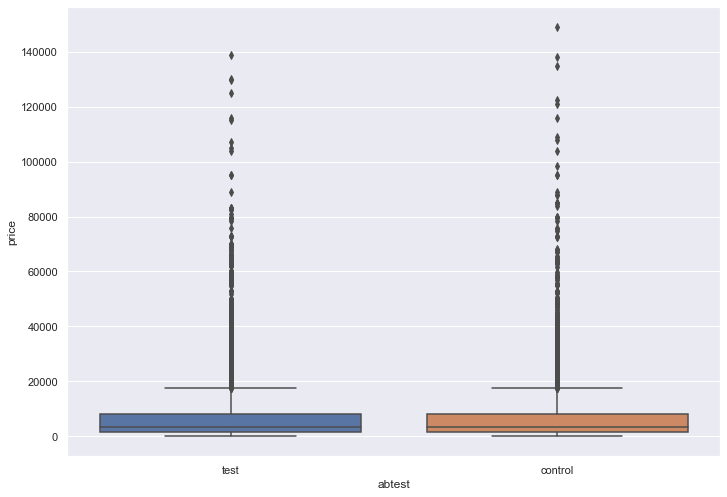

In [39]:
#equal distribution
sns.boxplot(x = 'abtest', y = 'price', data = cars)
#still quite similar. it doesn't affect price at all
#therefore this column is also insignificant.

In [40]:
#var: vehicleType
cars.vehicleType.value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

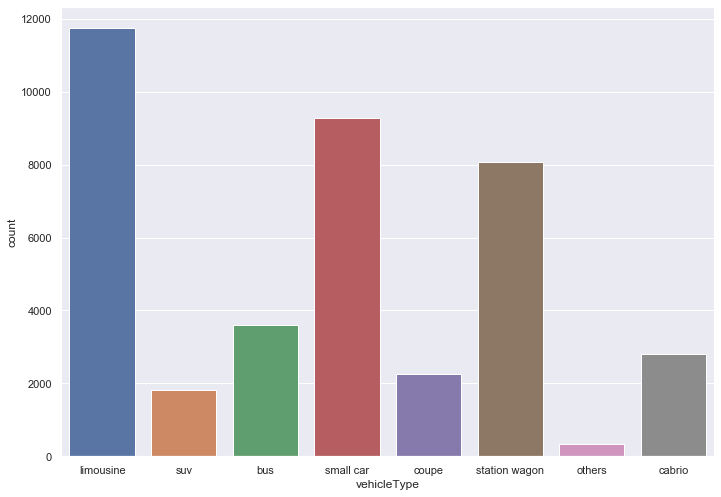

In [41]:
sns.countplot(x = 'vehicleType', data = cars)

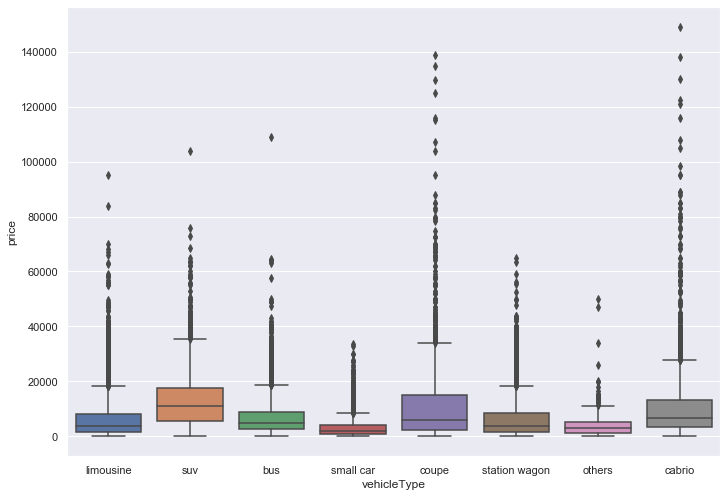

In [42]:
sns.boxplot(x = 'vehicleType', y = 'price', data = cars)
#vehicleType affects price, as the boxplots are different.

In [43]:
#var: gearbox
cars.gearbox.value_counts()
#manual is much more than automatic

manual       32582
automatic     9396
Name: gearbox, dtype: int64

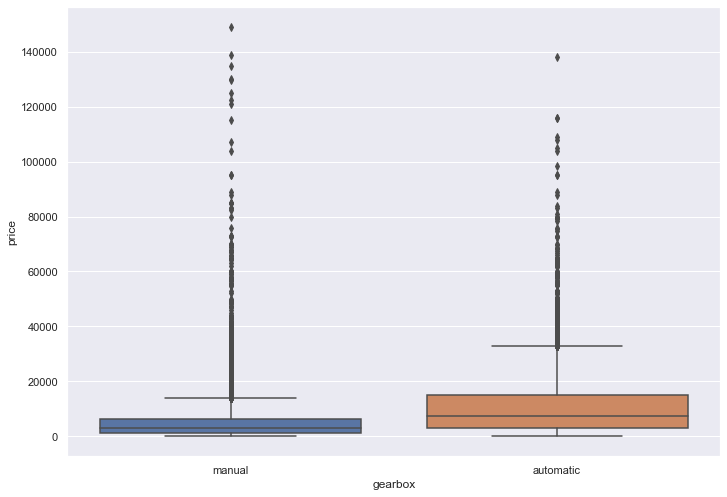

In [44]:
sns.boxplot(x = 'gearbox', y = 'price', data = cars)
#gearbox also affects price.

In [45]:
#var: model
cars.model.value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
rangerover       1
elefantino       1
200              1
charade          1
serie_2          1
Name: model, Length: 247, dtype: int64

In [46]:
#247 models!
#sns.boxplot(x = 'model', y = 'price', data = cars)
#isnt even showing cause too many models (takes a lot of time)

In [47]:
#var: kilometer
cars.kilometer.value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [48]:
pd.crosstab(cars.kilometer, columns = 'count', normalize = True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


In [49]:
cars.kilometer.describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

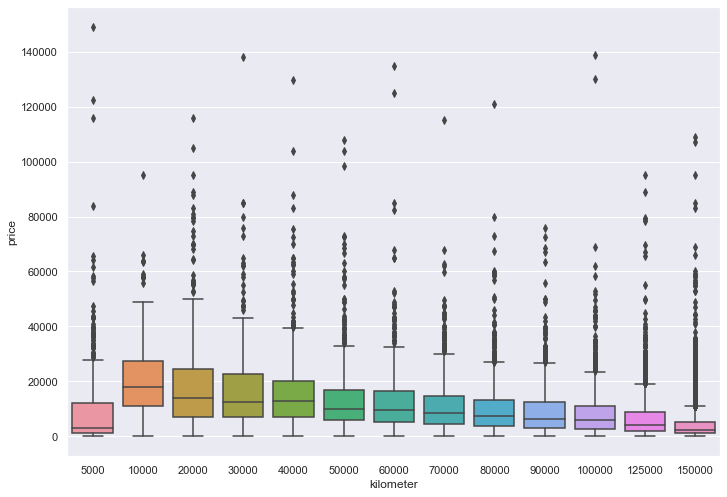

In [50]:
sns.boxplot(x = 'kilometer', y = 'price', data = cars)
#except for the first pink boxplot, the others show a trend that
#as KM increases, price decreases

In [51]:
#var: fueltype
cars.fuelType.value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [52]:
pd.crosstab(cars.fuelType, columns = 'count', normalize = True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


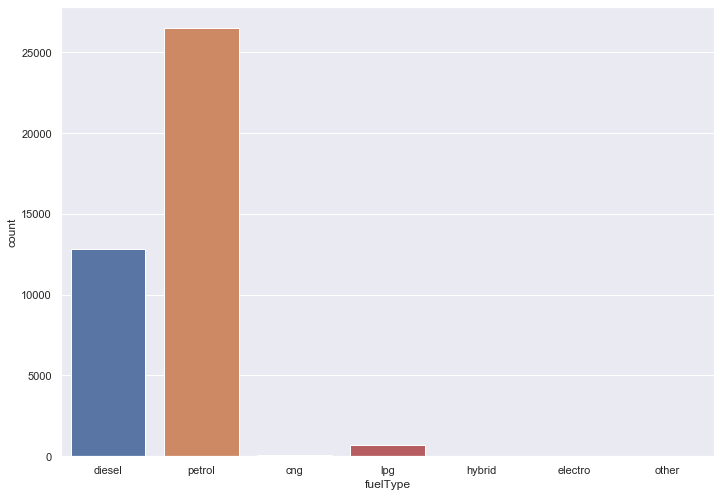

In [53]:
sns.countplot(x = 'fuelType', data = cars)
#effect of hybrid, electro and others are very low

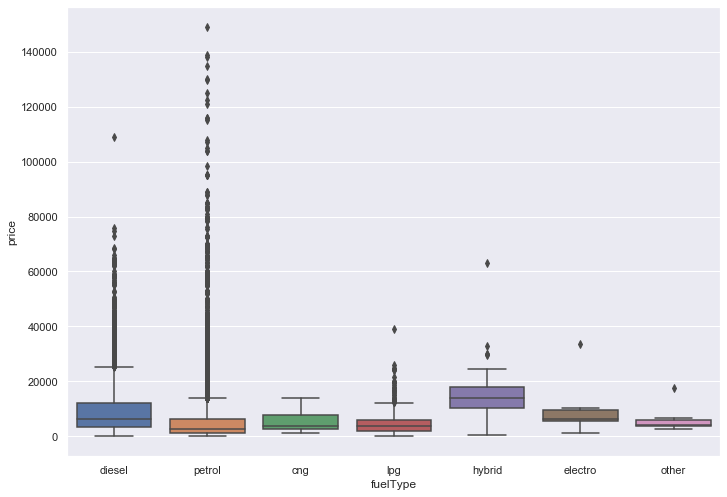

In [54]:
sns.boxplot(x = 'fuelType', y = 'price', data = cars)
#price is affected by fuelType

In [55]:
#var: brand
cars.brand.value_counts()

volkswagen       9134
bmw              4868
opel             4487
mercedes_benz    4134
audi             3984
ford             2815
renault          1941
peugeot          1323
fiat              996
seat              886
skoda             698
mazda             663
smart             623
nissan            601
citroen           598
toyota            547
volvo             429
mini              428
hyundai           406
mitsubishi        359
honda             300
others            299
kia               276
suzuki            264
porsche           260
alfa_romeo        245
chevrolet         213
chrysler          151
dacia             123
subaru            112
jeep               91
land_rover         81
jaguar             78
daihatsu           67
saab               65
lancia             56
rover              53
daewoo             53
trabant            43
lada               22
Name: brand, dtype: int64

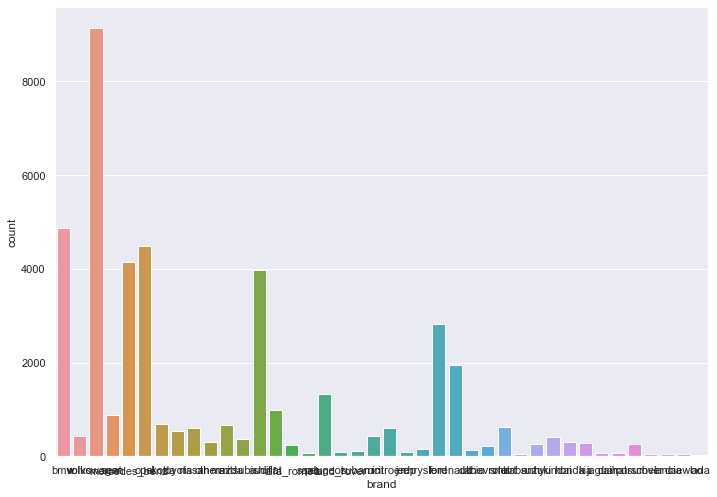

In [56]:
sns.countplot(x = 'brand', data = cars)

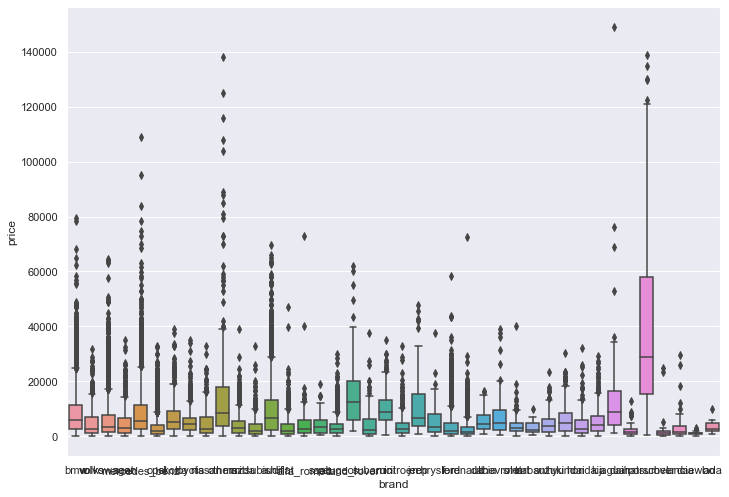

In [57]:
sns.boxplot(x = 'brand', y = 'price', data=cars)
#price is affected by brand

In [58]:
#var : notRepairedDamage
#yes : damaged, but not rectified
#no : damaged, but rectified

cars.notRepairedDamage.value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

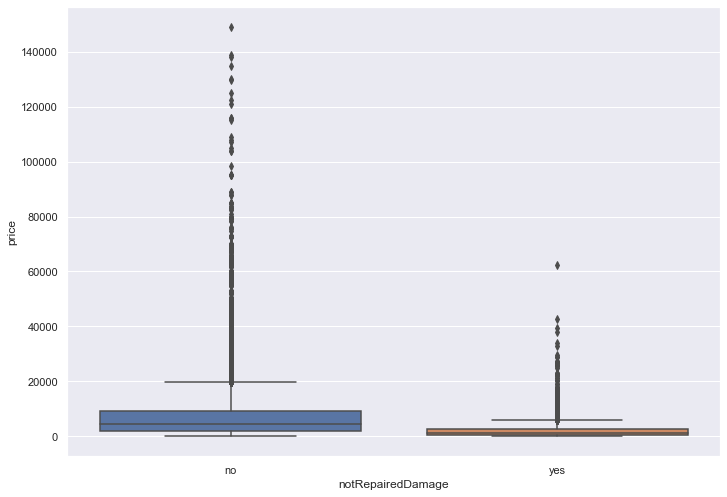

In [59]:
sns.boxplot(x = 'notRepairedDamage', y = 'price', data = cars)
#price is affected to be low if car damage is not rectified

In [60]:
#remove insignificant variables
col = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns = col, axis = 1)
cars1 = cars.copy()

In [61]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
price                42772 non-null int64
vehicleType          39896 non-null object
gearbox              41978 non-null object
powerPS              42772 non-null int64
model                41089 non-null object
kilometer            42772 non-null int64
fuelType             40175 non-null object
brand                42772 non-null object
notRepairedDamage    36495 non-null object
Age                  42772 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 3.6+ MB


In [62]:
#correlation
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [63]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:]
#.loc[] based on price(first column), with absolute value, and sort in descending order
#from rows 1, excluding 0th row as it is price row.
#just making it more readable

#powerPS has good correlation
#other 2 don't have a very good influence on price

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [64]:
#Linear Regression Model

In [65]:
cars_omit = cars.dropna(axis = 0)

In [66]:
cars_omit.to_csv("omitted_data_cars_sampled.csv")

In [67]:
cars_omit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 1 to 50000
Data columns (total 10 columns):
price                32884 non-null int64
vehicleType          32884 non-null object
gearbox              32884 non-null object
powerPS              32884 non-null int64
model                32884 non-null object
kilometer            32884 non-null int64
fuelType             32884 non-null object
brand                32884 non-null object
notRepairedDamage    32884 non-null object
Age                  32884 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.8+ MB


In [68]:
cars_odata = pd.read_csv("omitted_data_cars_sampled.csv")

In [69]:
cars_odata.drop('Unnamed: 0', axis = 1)

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
0,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
1,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
2,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
3,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
4,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920
...,...,...,...,...,...,...,...,...,...,...
32879,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
32880,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
32881,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
32882,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [70]:
#Model 1A Regression
#Y: Price, X1: power X2: Kilometre, X3: Age

In [71]:
x1 = cars_odata.filter(['powerPS', 'kilometer', 'Age'], axis = 1)
y1 = cars_odata.filter(['price'], axis = 1)

In [76]:
import sklearn
from sklearn import *

In [77]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x1, y1, test_size = 0.3, random_state = 3)
#random_state = 3 to reproduce result
#just have a number, and be consistent with it
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(23018, 3) (9866, 3) (23018, 1) (9866, 1)


In [91]:
#measuring severity for multicolinearity
#VIF > 5 => high multicolinearity
#Variance Inflation Factor

def calcVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = sklearn.linear_model.LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for i in range(num_features): #running a L.R. for all the features with one as dep. and other as indep. variables
        x_features = features[:]
        y_features = features[i]
        x_features.remove(y_features)
    
        model.fit(data[x_features], data[y_features])
        result[y_features] = 1/(1 - model.score(data[x_features], data[y_features]))
        #VIF FORMULA
        #model.score = R^2 value
    return result

#R^2 = coefficient of determination
#R^2 = 1 - (SSE/SST)

In [96]:
def RMSE(test_y, pred_y):
    rmse_test = np.sqrt(sklearn.metrics.mean_squared_error(test_y, pred_y))
    #for base rmse, i.e rmse with mean
    base_pred = np.repeat(np.mean(test_y), len(test_y))
    rmse_base = np.sqrt(sklearn.metrics.mean_squared_error(test_y, base_pred))
    values = {"Model RMSE ":rmse_test,"Base RMSE":rmse_base}
    return values

In [84]:
import statsmodels.api as sm

In [88]:
#Linear Regression

x_train2 = sm.add_constant(x_train)
model_lin1 = sm.OLS(y_train, x_train2)
results1 = model_lin1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     9978.
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:27:55   Log-Likelihood:            -2.3087e+05
No. Observations:               23018   AIC:                         4.617e+05
Df Residuals:                   23014   BIC:                         4.618e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.057e+04    155.533     67.928      0.0

In [89]:
x_test = sm.add_constant(x_test)
cars_pred_lin1_test = results1.predict(x_test)

In [94]:
vif_val = calcVIF(x_train)
vif_val = vif_val.transpose()
print(vif_val)

            VIF
powerPS   1.053
kilometer 1.219
Age       1.274


In [97]:
RMSE(y_test, cars_pred_lin1_test)

{'Model RMSE ': 5331.18816003728, 'Base RMSE': 8189.787602929657}

In [98]:
cars_pred_lin1_train = results1.predict(x_train2)

In [99]:
#Diagnostics

In [101]:
residuals = y_train.iloc[:,0] - cars_pred_lin1_train

#Error for predicted y's


#Regression Assumptions to be checked:
#Errors are normally distributed
#Mean of errors nearer to 0
#Variance of errors nearer to sigma^2

Text(0.5, 1.0, 'Residual Plot')

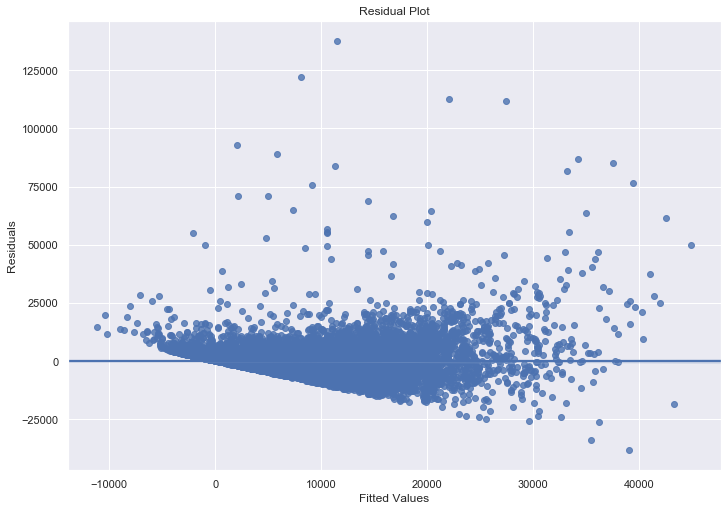

In [105]:
#Residual plot
sns.regplot(x = cars_pred_lin1_train, y = residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

#Funnel shape indicates HETEROSKEDASTICITY!
#violates mean value of errors is 0, variance is sigma^2
#variance is increasing, not constant

Text(0.5, 1.0, 'Normal Q-Q Plot')

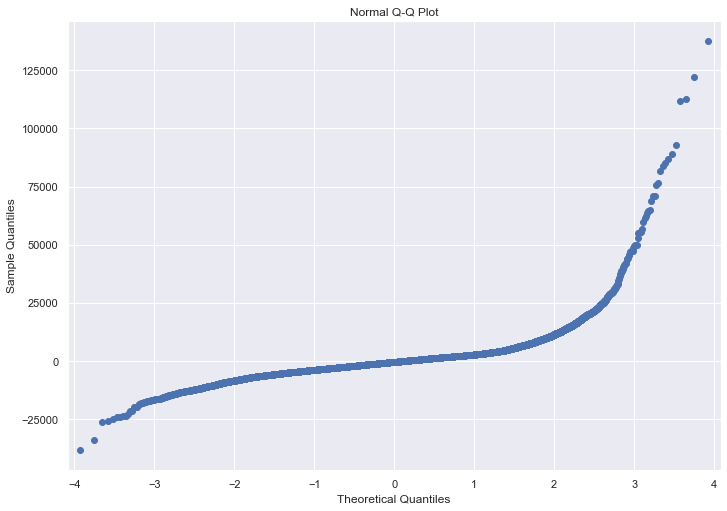

In [106]:
#QQ Plot
sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")

#Errors aren't normally distd. as there's a curve, not a 45deg line thro the origin

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265AEFCB6C8>,
      dtype=object)

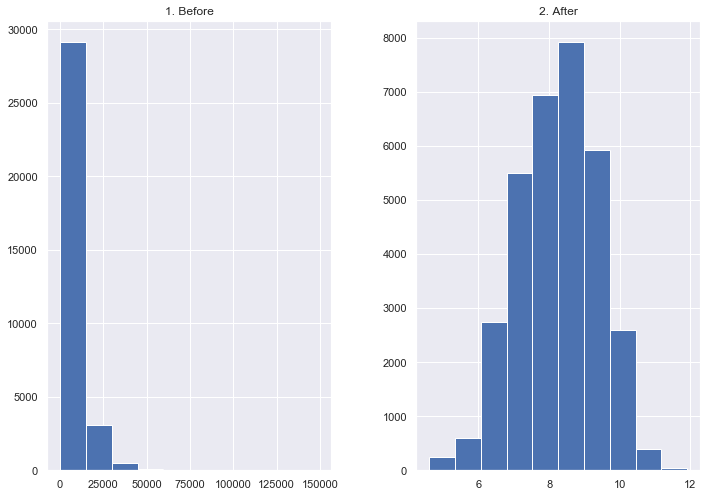

In [108]:
#Transforming price to log(price)

prices = pd.DataFrame({"1. Before" : y1.iloc[:, 0], "2. After" : np.log(y1.iloc[:, 0])})
prices.hist()

#Log price is more normally distd.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265AFFA5388>,
      dtype=object)

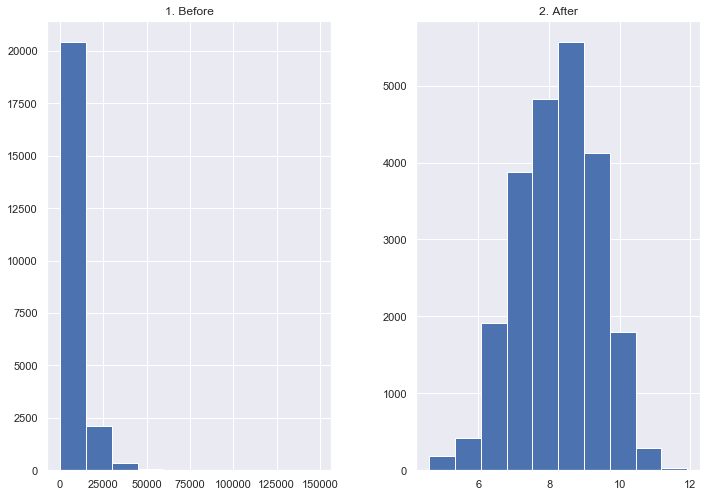

In [109]:
#Transforming price to log(price)

prices = pd.DataFrame({"1. Before" : y_train.iloc[:, 0], "2. After" : np.log(y_train.iloc[:, 0])})
prices.hist()

#Log price is more normally distd.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265AFFAE648>,
      dtype=object)

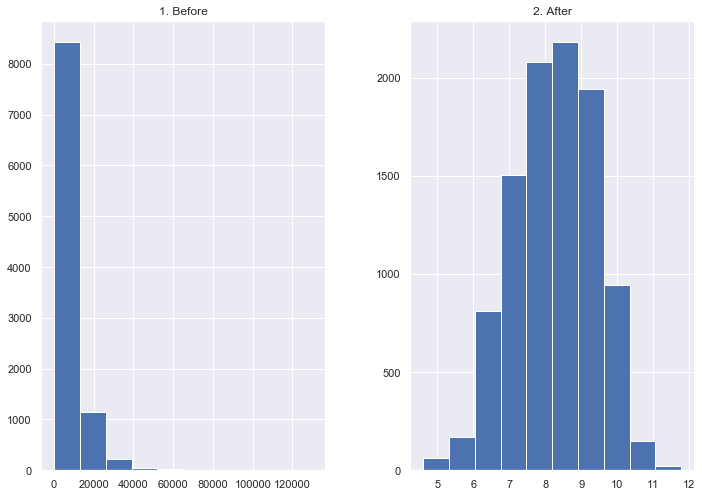

In [110]:
#Transforming price to log(price)

prices = pd.DataFrame({"1. Before" : y_test.iloc[:, 0], "2. After" : np.log(y_test.iloc[:, 0])})
prices.hist()

#Log price is more normally distd.

In [113]:
y2 = np.log(y1)
y_train_log, y_test_log = sklearn.model_selection.train_test_split(y2, test_size = 0.3, random_state = 3)

In [132]:
#Model 1B Regression

#Linear Regression

x_train2 = sm.add_constant(x_train)
model_lin2 = sm.OLS(y_train_log, x_train2)
results2 = model_lin2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:56:08   Log-Likelihood:                -24217.
No. Observations:               23018   AIC:                         4.844e+04
Df Residuals:                   23014   BIC:                         4.847e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0923      0.020    463.346      0.0

In [133]:
x_test = sm.add_constant(x_test)
cars_pred_lin2_test = results2.predict(x_test)

In [134]:
def RMSE_Log(testlog_y, predlog_y):
    test_y = np.exp(testlog_y)
    pred_y = np.exp(predlog_y) #convert back to normal from log
    rmse_test = np.sqrt(sklearn.metrics.mean_squared_error(test_y, pred_y))
    #for base rmse, i.e rmse with mean
    base_pred = np.repeat(np.mean(test_y), len(test_y))
    rmse_base = np.sqrt(sklearn.metrics.mean_squared_error(test_y, base_pred))
    values = {"Model RMSE ":rmse_test,"Base RMSE":rmse_base}
    return values

In [140]:
RMSE_Log(y_test_log, cars_pred_lin2_test)

{'Model RMSE ': 9016.23374441739, 'Base RMSE': 8189.787602929656}

In [141]:
cars_pred_lin2_train = results2.predict(x_train2)

In [144]:
residuals = y_train_log.iloc[:,0] - cars_pred_lin2_train

#Error for predicted y's


#Regression Assumptions to be checked:
#Errors are normally distributed
#Mean of errors nearer to 0
#Variance of errors nearer to sigma^2

Text(0.5, 1.0, 'Residual Plot')

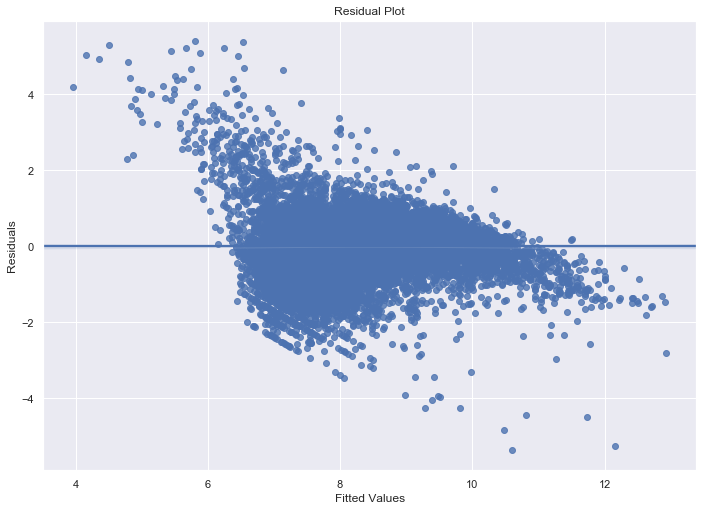

In [145]:
#Residual plot
sns.regplot(x = cars_pred_lin2_train, y = residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

#Funnel shape indicates 
#violates mean value of errors is 0, variance is sigma^2
#variance is increasing, not constant

Text(0.5, 1.0, 'Normal Q-Q Plot')

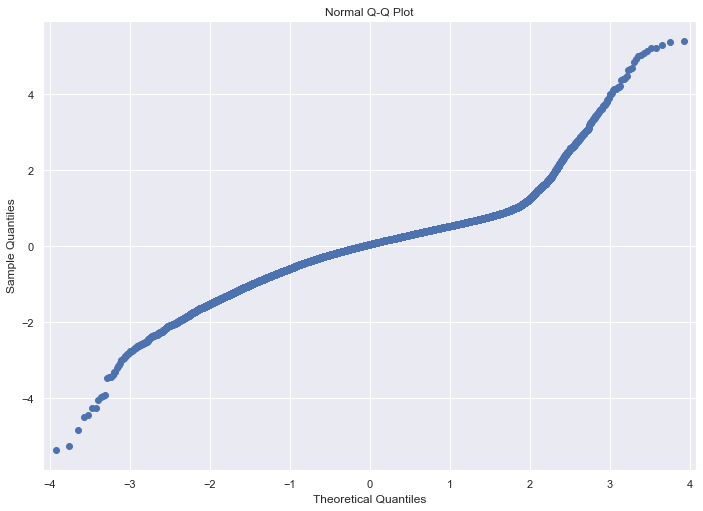

In [146]:
#QQ Plot
sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")

#Errors aren't normally distd. as there's a curve, not a 45deg line thro the origin

In [156]:
#Full Model, with Log Price

x1 = cars_odata.drop(['price', 'model', 'brand', 'Unnamed: 0'], axis = 'columns', inplace = False)
x1 = pd.get_dummies(x1, drop_first = True)
x_train, x_test = sklearn.model_selection.train_test_split(x1, test_size = 0.3, random_state = 3)

In [157]:
#Linear Regression
x_train2 = sm.add_constant(x_train)
model_lin3 = sm.OLS(y_train_log, x_train2)
results3 = model_lin3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     3248.
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:07:12   Log-Likelihood:                -21042.
No. Observations:               23018   AIC:                         4.212e+04
Df Residuals:                   22999   BIC:                         4.227e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [158]:
x_test = sm.add_constant(x_test)
cars_pred_lin3_test = results3.predict(x_test)

RMSE_Log(y_test_log, cars_pred_lin3_test)
cars_pred_lin3_train = results3.predict(x_train2)

In [159]:
#Diagnostics
residuals = y_train_log.iloc[:,0] - cars_pred_lin2_train

#Error for predicted y's


#Regression Assumptions to be checked:
#Errors are normally distributed
#Mean of errors nearer to 0
#Variance of errors nearer to sigma^2


Text(0.5, 1.0, 'Residual Plot')

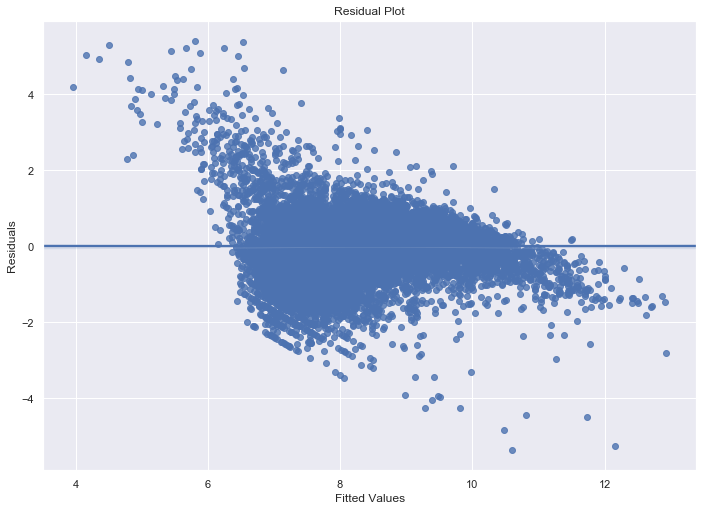

In [160]:
#Residual plot
sns.regplot(x = cars_pred_lin2_train, y = residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

#Funnel shape indicates 
#violates mean value of errors is 0, variance is sigma^2
#variance is increasing, not constant

Text(0.5, 1.0, 'Normal Q-Q Plot')

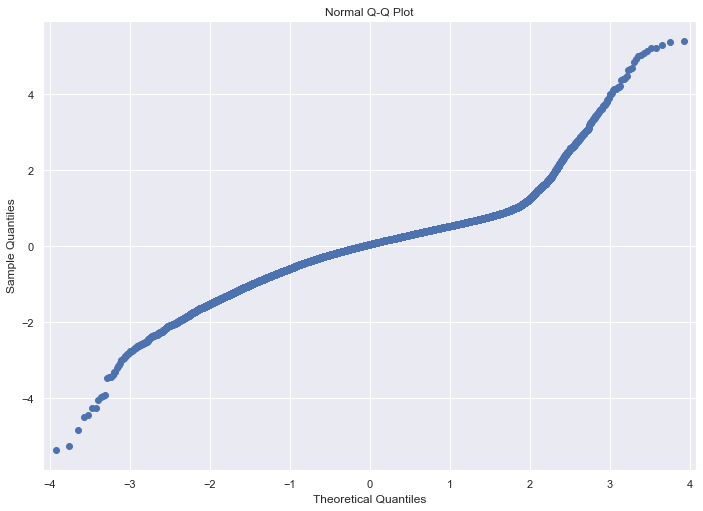

In [161]:
#QQ Plot
sm.qqplot(residuals)
plt.title("Normal Q-Q Plot")

#Errors aren't normally distd. as there's a curve, not a 45deg line thro the origin

In [162]:
#fuel_Type = electro
#fuel_type = hybrid 
#is to be dropped further because they have very high P(t) values in the table, which is way higher than the allowed 0.05 significance level

In [163]:
#Random Forest Model

In [170]:
cars_odata = pd.read_csv('omitted_data_cars_sampled.csv')
cars_odata = cars_odata.drop('Unnamed: 0', axis = 1)
x1 = cars_odata.drop(['price', 'model', 'brand'], axis = 'columns', inplace = False)
x2 = pd.get_dummies(x1, drop_first = True)
y1 = cars_odata.filter(['price'], axis = 1)
y2 = np.log(y1)

In [171]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x2, y2, test_size = 0.3, random_state = 3)
print(x_train.shape, y_train.shape, x_test.shape, y_train.shape)

(23018, 18) (23018, 1) (9866, 18) (23018, 1)


In [173]:
def RMSE_Log(testlog_y, predlog_y):
    test_y = np.exp(testlog_y)
    pred_y = np.exp(predlog_y) #convert back to normal from log
    rmse_test = np.sqrt(sklearn.metrics.mean_squared_error(test_y, pred_y))
    #for base rmse, i.e rmse with mean
    base_pred = np.repeat(np.mean(test_y), len(test_y))
    rmse_base = np.sqrt(sklearn.metrics.mean_squared_error(test_y, base_pred))
    values = {"Model RMSE ":rmse_test,"Base RMSE":rmse_base}
    return values

In [174]:
rf = sklearn.ensemble.RandomForestRegressor(n_estimators = 220, max_depth = 87)
#Classification: Classifier
#n_estimators: no. of trees in the forest
#max_depth : depth of each tree. No arg => till they're leaves
model_rf1 = rf.fit(x_train, y_train)

c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [175]:
cars_pred_rf1_test = rf.predict(x_test)
RMSE_Log(y_test, cars_pred_rf1_test)

{'Model RMSE ': 3906.4107304394624, 'Base RMSE': 8189.787602929656}

In [176]:
model_rf1.score(x_train, y_train)

#R^2 value
#No adj. R^2 because no. of variables used keeps differing

0.9647372636335682

In [179]:
#Hyperparameter Tuning

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 600, num = 15)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]

min_samples_split = np.arange(100, 1100, 100)

print(n_estimators, max_depth, min_samples_split, sep = '\n')

[10, 52, 94, 136, 178, 220, 262, 305, 347, 389, 431, 473, 515, 557, 600]
[10, 21, 32, 43, 54, 65, 76, 87, 98, 110]
[ 100  200  300  400  500  600  700  800  900 1000]


In [181]:
grid1 = {'n_estimators': n_estimators}
grid2 = {'max_depth': max_depth}
grid3 = {'min_samples_split': min_samples_split}

In [182]:
randomgrid = {'n_estimators':n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
print(randomgrid)

{'n_estimators': [10, 52, 94, 136, 178, 220, 262, 305, 347, 389, 431, 473, 515, 557, 600], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110], 'min_samples_split': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])}


In [184]:
#Creating the base model
rf_for_tuning = sklearn.ensemble.RandomForestRegressor()

#Tries a fit and score for all the different hyper parameters specified
#Refer documentation
#3 fold cross validation
rf_random = sklearn.model_selection.RandomizedSearchCV(estimator = rf_for_tuning, param_distributions = randomgrid, n_iter = 20, cv = 3, verbose = 2, random_state = 1)

rf_random.fit(x_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=52, min_samples_split=700, max_depth=10 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=700, max_depth=10, total=   1.4s
[CV] n_estimators=52, min_samples_split=700, max_depth=10 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=700, max_depth=10, total=   1.5s
[CV] n_estimators=52, min_samples_split=700, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=700, max_depth=10, total=   1.5s
[CV] n_estimators=10, min_samples_split=600, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=600, max_depth=10, total=   0.3s
[CV] n_estimators=10, min_samples_split=600, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=600, max_depth=10, total=   0.3s
[CV] n_estimators=10, min_samples_split=600, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=600, max_depth=10, total=   0.3s
[CV] n_estimators=178, min_samples_split=500, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=500, max_depth=98, total=   5.4s
[CV] n_estimators=178, min_samples_split=500, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=500, max_depth=98, total=   5.4s
[CV] n_estimators=178, min_samples_split=500, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=500, max_depth=98, total=   5.4s
[CV] n_estimators=10, min_samples_split=300, max_depth=32 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=300, max_depth=32, total=   0.3s
[CV] n_estimators=10, min_samples_split=300, max_depth=32 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=300, max_depth=32, total=   0.4s
[CV] n_estimators=10, min_samples_split=300, max_depth=32 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=300, max_depth=32, total=   0.3s
[CV] n_estimators=600, min_samples_split=1000, max_depth=98 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=1000, max_depth=98, total=  14.4s
[CV] n_estimators=600, min_samples_split=1000, max_depth=98 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=1000, max_depth=98, total=  14.6s
[CV] n_estimators=600, min_samples_split=1000, max_depth=98 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=1000, max_depth=98, total=  14.4s
[CV] n_estimators=389, min_samples_split=200, max_depth=65 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=200, max_depth=65, total=  14.8s
[CV] n_estimators=389, min_samples_split=200, max_depth=65 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=200, max_depth=65, total=  14.5s
[CV] n_estimators=389, min_samples_split=200, max_depth=65 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=200, max_depth=65, total=  14.7s
[CV] n_estimators=136, min_samples_split=1000, max_depth=76 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=136, min_samples_split=1000, max_depth=76, total=   3.2s
[CV] n_estimators=136, min_samples_split=1000, max_depth=76 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=136, min_samples_split=1000, max_depth=76, total=   3.3s
[CV] n_estimators=136, min_samples_split=1000, max_depth=76 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=136, min_samples_split=1000, max_depth=76, total=   3.3s
[CV] n_estimators=431, min_samples_split=600, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=600, max_depth=98, total=  12.3s
[CV] n_estimators=431, min_samples_split=600, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=600, max_depth=98, total=  12.2s
[CV] n_estimators=431, min_samples_split=600, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=600, max_depth=98, total=  12.3s
[CV] n_estimators=431, min_samples_split=800, max_depth=87 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=800, max_depth=87, total=  11.1s
[CV] n_estimators=431, min_samples_split=800, max_depth=87 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=800, max_depth=87, total=  11.1s
[CV] n_estimators=431, min_samples_split=800, max_depth=87 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=800, max_depth=87, total=  11.0s
[CV] n_estimators=220, min_samples_split=300, max_depth=32 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=300, max_depth=32, total=   7.5s
[CV] n_estimators=220, min_samples_split=300, max_depth=32 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=300, max_depth=32, total=   7.6s
[CV] n_estimators=220, min_samples_split=300, max_depth=32 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=300, max_depth=32, total=   7.5s
[CV] n_estimators=431, min_samples_split=600, max_depth=54 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=600, max_depth=54, total=  12.4s
[CV] n_estimators=431, min_samples_split=600, max_depth=54 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=600, max_depth=54, total=  12.4s
[CV] n_estimators=431, min_samples_split=600, max_depth=54 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=431, min_samples_split=600, max_depth=54, total=  12.2s
[CV] n_estimators=52, min_samples_split=300, max_depth=21 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=300, max_depth=21, total=   1.8s
[CV] n_estimators=52, min_samples_split=300, max_depth=21 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=300, max_depth=21, total=   1.8s
[CV] n_estimators=52, min_samples_split=300, max_depth=21 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=300, max_depth=21, total=   1.8s
[CV] n_estimators=220, min_samples_split=200, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=200, max_depth=98, total=   8.4s
[CV] n_estimators=220, min_samples_split=200, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=200, max_depth=98, total=   8.3s
[CV] n_estimators=220, min_samples_split=200, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=200, max_depth=98, total=   8.2s
[CV] n_estimators=473, min_samples_split=700, max_depth=10 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=473, min_samples_split=700, max_depth=10, total=  12.9s
[CV] n_estimators=473, min_samples_split=700, max_depth=10 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=473, min_samples_split=700, max_depth=10, total=  12.8s
[CV] n_estimators=473, min_samples_split=700, max_depth=10 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=473, min_samples_split=700, max_depth=10, total=  12.9s
[CV] n_estimators=94, min_samples_split=700, max_depth=54 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=94, min_samples_split=700, max_depth=54, total=   2.6s
[CV] n_estimators=94, min_samples_split=700, max_depth=54 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=94, min_samples_split=700, max_depth=54, total=   2.6s
[CV] n_estimators=94, min_samples_split=700, max_depth=54 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=94, min_samples_split=700, max_depth=54, total=   2.5s
[CV] n_estimators=52, min_samples_split=600, max_depth=87 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=600, max_depth=87, total=   1.5s
[CV] n_estimators=52, min_samples_split=600, max_depth=87 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=600, max_depth=87, total=   1.5s
[CV] n_estimators=52, min_samples_split=600, max_depth=87 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=600, max_depth=87, total=   1.5s
[CV] n_estimators=178, min_samples_split=200, max_depth=21 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=200, max_depth=21, total=   6.7s
[CV] n_estimators=178, min_samples_split=200, max_depth=21 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=200, max_depth=21, total=   6.9s
[CV] n_estimators=178, min_samples_split=200, max_depth=21 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=200, max_depth=21, total=   6.8s
[CV] n_estimators=473, min_samples_split=200, max_depth=76 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=473, min_samples_split=200, max_depth=76, total=  17.9s
[CV] n_estimators=473, min_samples_split=200, max_depth=76 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=473, min_samples_split=200, max_depth=76, total=  17.9s
[CV] n_estimators=473, min_samples_split=200, max_depth=76 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=473, min_samples_split=200, max_depth=76, total=  17.3s
[CV] n_estimators=220, min_samples_split=700, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=700, max_depth=98, total=   6.0s
[CV] n_estimators=220, min_samples_split=700, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=700, max_depth=98, total=   5.7s
[CV] n_estimators=220, min_samples_split=700, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=220, min_samples_split=700, max_depth=98, total=   5.7s
[CV] n_estimators=389, min_samples_split=800, max_depth=32 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=800, max_depth=32, total=   9.9s
[CV] n_estimators=389, min_samples_split=800, max_depth=32 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=800, max_depth=32, total=   9.9s
[CV] n_estimators=389, min_samples_split=800, max_depth=32 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=800, max_depth=32, total=   9.9s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.5min finished
c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:741: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 220, 'min_samples_split': 200, 'max_depth': 98}


In [185]:
rf_random.fit(x_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=52, min_samples_split=700, max_depth=10 ............
[CV]  n_estimators=52, min_samples_split=700, max_depth=10, total=   1.5s
[CV] n_estimators=52, min_samples_split=700, max_depth=10 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=700, max_depth=10, total=   1.4s
[CV] n_estimators=52, min_samples_split=700, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=52, min_samples_split=700, max_depth=10, total=   1.4s
[CV] n_estimators=10, min_samples_split=600, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=600, max_depth=10, total=   0.3s
[CV] n_estimators=10, min_samples_split=600, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=600, max_depth=10, total=   0.3s
[CV] n_estimators=10, min_samples_split=600, max_depth=10 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=600, max_depth=10, total=   0.3s
[CV] n_estimators=178, min_samples_split=500, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=500, max_depth=98, total=   5.4s
[CV] n_estimators=178, min_samples_split=500, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=500, max_depth=98, total=   5.4s
[CV] n_estimators=178, min_samples_split=500, max_depth=98 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=178, min_samples_split=500, max_depth=98, total=   5.3s
[CV] n_estimators=10, min_samples_split=300, max_depth=32 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=300, max_depth=32, total=   0.4s
[CV] n_estimators=10, min_samples_split=300, max_depth=32 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=300, max_depth=32, total=   0.4s
[CV] n_estimators=10, min_samples_split=300, max_depth=32 ............


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=10, min_samples_split=300, max_depth=32, total=   0.4s
[CV] n_estimators=600, min_samples_split=1000, max_depth=98 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=1000, max_depth=98, total=  14.3s
[CV] n_estimators=600, min_samples_split=1000, max_depth=98 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=1000, max_depth=98, total=  14.1s
[CV] n_estimators=600, min_samples_split=1000, max_depth=98 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=600, min_samples_split=1000, max_depth=98, total=  14.3s
[CV] n_estimators=389, min_samples_split=200, max_depth=65 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=200, max_depth=65, total=  14.5s
[CV] n_estimators=389, min_samples_split=200, max_depth=65 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=200, max_depth=65, total=  14.3s
[CV] n_estimators=389, min_samples_split=200, max_depth=65 ...........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=389, min_samples_split=200, max_depth=65, total=  14.6s
[CV] n_estimators=136, min_samples_split=1000, max_depth=76 ..........


c:\users\svish\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [186]:
#Assignment 9 - Test Workout

In [187]:
nyc = pd.read_csv('nyc.csv')
print(nyc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
Price      168 non-null int64
Food       168 non-null int64
Decor      168 non-null int64
Service    168 non-null int64
East       168 non-null int64
dtypes: int64(5)
memory usage: 6.7 KB
None


In [234]:
x1 = nyc.filter(['Food', 'Decor', 'Service', 'East'], axis = 1)
y1 = nyc.filter(['Price'], axis = 1)
print(x1.shape, y1.shape)

(168, 4) (168, 1)


In [243]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x1, y1, test_size = 0.25, random_state = 3)
#random_state = 3 to reproduce result
#just have a number, and be consistent with it
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(126, 4) (42, 4) (126, 1) (42, 1)


In [244]:
#Linear Regression

x_train2 = sm.add_constant(x_train)
model_lin1 = sm.OLS(y_train, x_train2)
results1 = model_lin1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     50.85
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           4.78e-25
Time:                        19:15:40   Log-Likelihood:                -397.83
No. Observations:                 126   AIC:                             805.7
Df Residuals:                     121   BIC:                             819.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0503      5.520     -3.994      0.0

In [245]:
x_test = sm.add_constant(x_test)
y_pred = results1.predict(x_test)
RMSE(y_test, y_pred)

{'Model RMSE ': 5.5795726613390775, 'Base RMSE': 9.061017647942561}

In [210]:
#p(t) for Service is very high
x1 = nyc.filter(['Food', 'Decor', 'East'], axis = 1)
y1 = nyc.filter(['Price'], axis = 1)

In [213]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x1, y1, test_size = 0.3, random_state = 3)
#random_state = 3 to reproduce result
#just have a number, and be consistent with it
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(117, 3) (51, 3) (117, 1) (51, 1)


In [215]:
#Linear Regression

x_train2 = sm.add_constant(x_train)
model_lin1 = sm.OLS(y_train, x_train2)
results1 = model_lin1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           5.10e-35
Time:                        19:05:16   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0269      4.673     -5.142      0.0

In [248]:
data=sns.load_dataset('anscombe')

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [246]:
x1 = data.x
y1 = data.y
print(x1.shape, y1.shape)

(44,) (44,)


In [222]:
#Linear Regression

x2 = sm.add_constant(x1)
model_lin1 = sm.OLS(y1, x2)
results1 = model_lin1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     83.92
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           1.44e-11
Time:                        19:07:32   Log-Likelihood:                -67.358
No. Observations:                  44   AIC:                             138.7
Df Residuals:                      42   BIC:                             142.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0013      0.521      5.765      0.0